# Importing stuff and declaring constants


In [457]:
import os
import pandas as pd
import calendar
from datetime import datetime
# import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np

TOTAL_MONTHLY_HRS = 150
monthly_hours = {calendar.month_name[i]: TOTAL_MONTHLY_HRS for i in range(1, 13)}
monthly_hours = pd.Series(monthly_hours)
monthly_hours

January      150
February     150
March        150
April        150
May          150
June         150
July         150
August       150
September    150
October      150
November     150
December     150
dtype: int64

# Reading Excel


In [458]:
allocation_sheet_df = pd.read_excel(os.path.join(
    os.getcwd(), './Main.xlsx'), sheet_name='Allocation')
employee_sheet_df = pd.read_excel(os.path.join(
    os.getcwd(), './Main.xlsx'), sheet_name='Employees')
project_sheet_df = pd.read_excel(os.path.join(
    os.getcwd(), './Main.xlsx'), sheet_name='Projects')


# Filtering Data


In [459]:
def get_month_number(month_name):
    months = {month.lower(): index for index, month in enumerate(
        calendar.month_name) if month}
    return months[month_name.lower()]


allocation_sheet_df['Month'] = [get_month_number(
    i) for i in allocation_sheet_df['Month']]
allocation_sheet_df.dropna(inplace=True)
allocation_sheet_df.drop_duplicates(inplace=True)
allocation_sheet_df


,Year,Month,Name of Employee,Branch,Project Name,Number of Hours,Percentage of Monthly Hours,Percentage Free This Month
0,2023,1,Ramesh R,Developer,Karim Services,50,27.7,72.3
1,2023,2,Ramesh R,Developer,Starry Artworks,70,27.7,72.3
2,2023,3,Rohit,Marketting,Earthern Pans,35,27.7,72.3
3,2023,1,Ramesh R,Developer,Hessington Oil,10,27.7,72.3
4,2023,3,William,IT,Karim Services,75,27.7,72.3
5,2023,4,Ramcharan,Technical,Skyler Parachutes,56,27.7,72.3
6,2023,1,Suresh,Web Designer,Karim Services,100,27.7,72.3
7,2023,3,Ramesh R,Developer,Skyler Parachutes,20,27.7,72.3
8,2023,1,Ramesh R,Developer,Karim Services,80,27.7,72.3
9,2023,1,Sridhar,Developer,Karim Services,80,27.7,72.3


# Creating Employees Dictionary which has everything

This has all the data about that employee. Now this is a dictionary, and you can use this dictionary which has important data to then plot graphs


In [460]:
employees = {}
# template
# employee = {
#     "name": "",
#     "position": "",
#     "projects": {'name': '', 'months' : months},
# }

for i in range(employee_sheet_df.__len__()):
    employee = {'name': employee_sheet_df.iloc[i].values[0],
                'branch': employee_sheet_df.iloc[i].values[1],
                'projects': {},
                }
    employees[employee_sheet_df.iloc[i].values[0]] = employee


newdf = []
for _, i in enumerate(employees):
    emp_df = allocation_sheet_df[i == allocation_sheet_df['Name of Employee']]
    # adding projects
    for j in range(len(emp_df)):
        employees[i]['projects'][emp_df.iloc[j]['Project Name']] = {}
        employees[i]['projects'][emp_df.iloc[j]['Project Name']] = {k: v for (k, v) in zip(
            [calendar.month_name[i] for i in range(1, 13)], [0 for i in range(1, 13)])}
    # assigning time for each project
    for j in range(len(emp_df)):
        employees[i]['projects'][emp_df.iloc[j]['Project Name']][calendar.month_name[emp_df['Month'].iloc[j]]] += \
            emp_df.iloc[j]['Number of Hours']



In [461]:
employees


{'Ramesh R': {'name': 'Ramesh R',
  'branch': 'Developer',
  'projects': {'Karim Services': {'January': 130,
    'February': 0,
    'March': 0,
    'April': 0,
    'May': 0,
    'June': 0,
    'July': 0,
    'August': 0,
    'September': 0,
    'October': 0,
    'November': 0,
    'December': 0},
   'Starry Artworks': {'January': 0,
    'February': 70,
    'March': 0,
    'April': 0,
    'May': 0,
    'June': 0,
    'July': 0,
    'August': 0,
    'September': 0,
    'October': 0,
    'November': 0,
    'December': 0},
   'Hessington Oil': {'January': 10,
    'February': 0,
    'March': 0,
    'April': 0,
    'May': 0,
    'June': 0,
    'July': 0,
    'August': 0,
    'September': 0,
    'October': 0,
    'November': 0,
    'December': 0},
   'Skyler Parachutes': {'January': 0,
    'February': 0,
    'March': 20,
    'April': 0,
    'May': 0,
    'June': 0,
    'July': 0,
    'August': 0,
    'September': 0,
    'October': 0,
    'November': 0,
    'December': 0}}},
 'Suresh': {'name'

# Creating Employee df


In [462]:
employee_df = pd.DataFrame(employees).transpose()
# employee_df[[True if 'Karim Services' in i.keys() else False for i in employee_df.projects ]]
employee_df


,name,branch,projects
Ramesh R,Ramesh R,Developer,"{'Karim Services': {'January': 130, 'February'..."
Suresh,Suresh,Web Designer,"{'Karim Services': {'January': 100, 'February'..."
Ramcharan,Ramcharan,Technical,"{'Skyler Parachutes': {'January': 0, 'February..."
Rohit,Rohit,Marketting,"{'Earthern Pans': {'January': 0, 'February': 0..."
William,William,IT,"{'Karim Services': {'January': 0, 'February': ..."
Sridhar,Sridhar,Developer,"{'Karim Services': {'January': 80, 'February':..."


# Graphs


In [463]:
plt.style.use('default')

In [464]:
employee_df

,name,branch,projects
Ramesh R,Ramesh R,Developer,"{'Karim Services': {'January': 130, 'February'..."
Suresh,Suresh,Web Designer,"{'Karim Services': {'January': 100, 'February'..."
Ramcharan,Ramcharan,Technical,"{'Skyler Parachutes': {'January': 0, 'February..."
Rohit,Rohit,Marketting,"{'Earthern Pans': {'January': 0, 'February': 0..."
William,William,IT,"{'Karim Services': {'January': 0, 'February': ..."
Sridhar,Sridhar,Developer,"{'Karim Services': {'January': 80, 'February':..."


In [465]:
# so we want to plot 4 employees on a single horizontal bar chart. The legend must have the name of the projects that they are working on.
# the x axis must have the months and the y axis must have the names of the employees.
# the bar chart must have the number of hours that each employee is working on each project.
# The legend must have the names of only those projects that the 4 employees we are displaying are working on.
# So to get the legend we must first get our four employees. Then we must get the projects that they are working on.

EMPLOYEE_PER_GRAGH = 4
current_employees_df = employee_df.iloc[:EMPLOYEE_PER_GRAGH]
projects_list = []

# get the projects that the current employees are working on.

# comprehension
# projects_list = [i[1].projects.keys() for i in current_employees_df.iterrows()]
# # get unique projects
# projects_list = list(set([i for j in projects_list for i in j]))

for i in current_employees_df.iterrows():
    projects_list.extend(i[1].projects.keys())

projects_list = list(set(projects_list))
projects_list.append('free_time')
category_colors = plt.colormaps['RdYlGn'](
    np.linspace(0.15, 0.85, projects_list.__len__()))

category_colors = pd.Series([i for i in category_colors], index=projects_list)
# print(projects_list)
print(category_colors)

Earthern Pans        [0.8988850442137639, 0.3054978854286813, 0.206...
Karim Services       [0.9886966551326413, 0.6573625528642827, 0.368...
Hessington Oil       [0.9973087274125336, 0.9165705497885429, 0.609...
Skyler Parachutes    [0.8977316416762784, 0.9569396386005383, 0.609...
Starry Artworks      [0.6263744713571706, 0.8402153018069974, 0.412...
free_time            [0.24805843906189928, 0.66720492118416, 0.3502...
dtype: object


In [466]:
# now well create dataframes for each person for each project. The project list only has the names of the projects that the four employees are working on.
employee_project_dataframes = {}
employee_project_dataframes_cumsum = {}
for i in current_employees_df.iterrows():
    current_employee_df = pd.DataFrame(
        index=projects_list, columns=these_months)
    for j in i[1].projects.keys():
        current_employee_df.loc[j] = i[1].projects[j]
    current_employee_df.fillna(0, inplace=True)
    current_employee_df.loc['free_time'] = monthly_hours - current_employee_df.sum(axis=0)
    # current_employee_df['Colors'] = [i for i in category_colors]
    # convert things in the dataframe to np arrays
    for j in current_employee_df.columns:
        current_employee_df[j] = np.array(current_employee_df[j])
    
            
    print(current_employee_df)
    employee_project_dataframes[i[0]] = current_employee_df
    employee_project_dataframes_cumsum[i[0]] = current_employee_df.cumsum(axis=0)

                   January  February  March  April
Earthern Pans            0         0      0      0
Karim Services         130         0      0      0
Hessington Oil          10         0      0      0
Skyler Parachutes        0         0     20      0
Starry Artworks          0        70      0      0
free_time               10        80    130    150
                   January  February  March  April
Earthern Pans            0         0      0      0
Karim Services         100         0      0      0
Hessington Oil           0         0      0      0
Skyler Parachutes        0         0      0      0
Starry Artworks          0         0      0      0
free_time               50       150    150    150
                   January  February  March  April
Earthern Pans            0         0      0      0
Karim Services           0         0      0      0
Hessington Oil           0         0      0      0
Skyler Parachutes        0         0      0     56
Starry Artworks          0     

In [467]:
employee_project_dataframes_cumsum

{'Ramesh R':                    January  February  March  April
 Earthern Pans            0         0      0      0
 Karim Services         130         0      0      0
 Hessington Oil         140         0      0      0
 Skyler Parachutes      140         0     20      0
 Starry Artworks        140        70     20      0
 free_time              150       150    150    150,
 'Suresh':                    January  February  March  April
 Earthern Pans            0         0      0      0
 Karim Services         100         0      0      0
 Hessington Oil         100         0      0      0
 Skyler Parachutes      100         0      0      0
 Starry Artworks        100         0      0      0
 free_time              150       150    150    150,
 'Ramcharan':                    January  February  March  April
 Earthern Pans            0         0      0      0
 Karim Services           0         0      0      0
 Hessington Oil           0         0      0      0
 Skyler Parachutes        0

Ramesh R ---------------------------------
Suresh ---------------------------------
Ramcharan ---------------------------------
Rohit ---------------------------------


Text(0.5, 0.98, 'Employee Project Distribution')

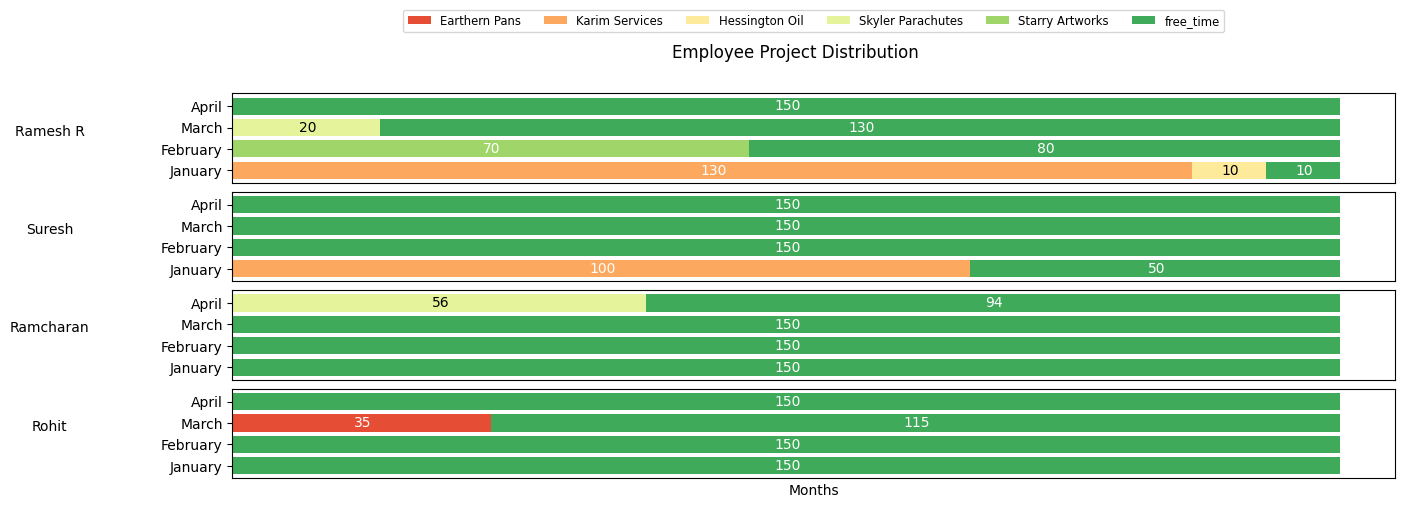

In [470]:
labels = list(these_months)
first_one_done = False
# making 4 subplots
fig, axes = plt.subplots(EMPLOYEE_PER_GRAGH, sharex=True, sharey=True, figsize=(15, 5))
plt.xlabel('Months')
plt.subplots_adjust(hspace=0.1)

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)  # labels along the bottom edge are off

# iterating through 4 subplots, each subplot is a different employee
for ax, emp_names in zip(axes, employee_project_dataframes_cumsum.keys()):

    # remove ticks on both axes for employees. 
    ax.tick_params(axis='x', which='both', bottom=False, 
                   top=False, labelbottom=False)
    # ax.tick_params(axis='y', which='both', left=False,
    #                labelleft=False)
    # ax.invert_yaxis()
    print(emp_names, '---------------------------------')
    ax.set_ylabel(emp_names, rotation=0, labelpad=80)

    # iterating through each project for that employee, there will be a few projects, and the y axis would have the months
    for i, (colname, color) in enumerate(zip(projects_list, category_colors)):     

        widths = employee_project_dataframes[emp_names].loc[colname]
        # print(widths)
        starts = employee_project_dataframes_cumsum[emp_names].loc[colname] - widths
        # print(starts)
        rects = ax.barh(labels, widths, left=starts,
                    label=colname, color=color)
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.3 else 'black'
        # print rects
        rects.datavalues = [np.nan if i == 0 else i for i in rects.datavalues]
        # print(rects.datavalues)
        ax.bar_label(rects, labels=rects.datavalues, 
                     label_type='center', color=text_color, padding=1, fmt='%.1f')
    if(not first_one_done):
        ax.legend(ncol=len(projects_list), loc='upper center',
                    fontsize='small', bbox_to_anchor=(0.5, 2))
        first_one_done = True
    
fig.suptitle('Employee Project Distribution')